In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Read in final dataset from Task2.2 and drop unneeded columns
df = pd.read_csv("Citi_Bike_LG_merge")
df = df.drop(["Unnamed: 0"],axis=1)

# created new df with date as index
df_temp = df.set_index("date")
# sorts based on index, which is date
df_temp = df_temp.sort_index(axis = 0, ascending=True)
df_temp.head()

,ride_id,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,avgTemp,_merge
date,,,,,,,,,,,
2022-01-01,05D00A80FBBEB287,2022-01-01 14:30:50.287,2022-01-02 16:13:36.951,Pearl St & Peck Slip,NaN,40.708485,-74.002751,NaN,NaN,11.6,both
2022-01-01,B6B79365A0B6642B,2022-01-01 14:33:03.780,2022-01-01 14:39:13.335,Front St & Gold St,Clinton St & Tillary St,40.702240,-73.982578,40.696233,-73.991421,11.6,both
2022-01-01,69D2AA31C704D09A,2022-01-01 13:31:07.449,2022-01-01 13:53:17.405,Central Park West & W 76 St,Madison Ave & E 120 St,40.778968,-73.973747,40.802950,-73.942954,11.6,both
2022-01-01,D06AE0665CF378FB,2022-01-01 07:48:37.764,2022-01-01 07:56:17.630,Henry St & Grand St,E 7 St & Avenue A,40.714211,-73.981095,40.726218,-73.983799,11.6,both
2022-01-01,7C1B090DA6F27F16,2022-01-01 14:30:56.726,2022-01-01 14:45:30.165,North Moore St & Greenwich St,Pearl St & Peck Slip,40.720195,-74.010301,40.708485,-74.002751,11.6,both


<Axes: xlabel='date'>

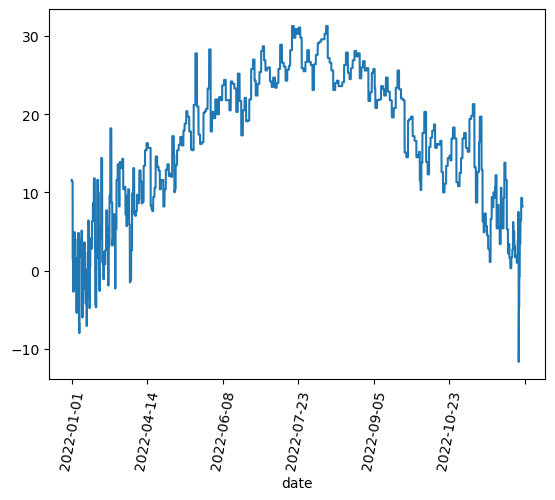

In [3]:
# Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. 
# Using pandas plotting function.
df_temp["avgTemp"].plot(kind="line", rot=80)

In [4]:
# Created a column with the count of trips per day
df_group = pd.DataFrame(df.groupby(["date"])["ride_id"].count()).reset_index()
df_group.rename(columns = {"ride_id":"bike_rides_daily"}, inplace = True)

In [5]:
df_group.sort_values(by="date")

,date,bike_rides_daily
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230
...,...,...
360,2022-12-27,33044
361,2022-12-28,44027
362,2022-12-29,51674
363,2022-12-30,62298


In [6]:
# Merge df_group with the weather dataframe
df_weather = pd.DataFrame(pd.read_csv("NY_LaGuardia_weather-station_2022"))
df_ride_weather = df_group.merge(df_weather, on = "date", how = "outer", indicator = "_merge2")

In [8]:
df_ride_weather.to_csv("Citi_Weather_Date")

In [7]:
# using date as index for easier plotting
df_ride_weather = df_ride_weather.set_index("date")
# sorts based on index, which is date
df_ride_weather = df_ride_weather.sort_index(axis = 0, ascending=True)

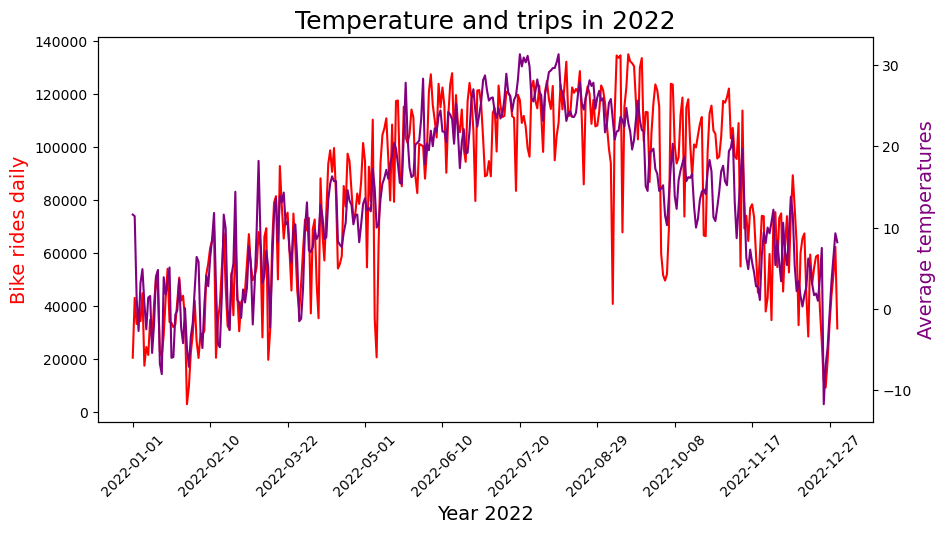

In [16]:
# Create a line chart of bike trip counts and temperatures plotted on a dual axis.
fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_ride_weather["bike_rides_daily"],color = "red")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "red", fontsize = 14) # set y-axis label
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # Limit number of x-ticks for readability 
ax.tick_params(axis='x', labelrotation=45) # Rotate dates so they don't overlap

# Initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_ride_weather["avgTemp"], color = "purple")
ax2.set_ylabel("Average temperatures", color = "purple",fontsize=14)

plt.title("Temperature and trips in 2022", fontsize = 18)
plt.show()

In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

I used object-oriented approach in matplotlib to create a plot with two subplots. I created the objects of fig, ax, and ax2. ax held the data for bike rides daily. ax2 held the data for the average tempature. They were both plotted on the figure as twin axes.